Laden der notwendigen Bibliotheken

In [1]:
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.image import AxesImage, NonUniformImage
import numpy as np
import math
from astropy.io import fits
from pathlib import Path
from scipy.signal import find_peaks

Dateiname des Referenzspektrums für die Ermittlung der Referenzwellenlängen

In [2]:
homepath = Path('.')
lamp_path = homepath / '..' / 'ref'
lamp_name = 'Neon-emission-spectra-solid-line-from-dust-free-dc-positive-column-thin-line-from.png'
lamp_file = lamp_path / lamp_name

Anzeige des Referenzspektrums


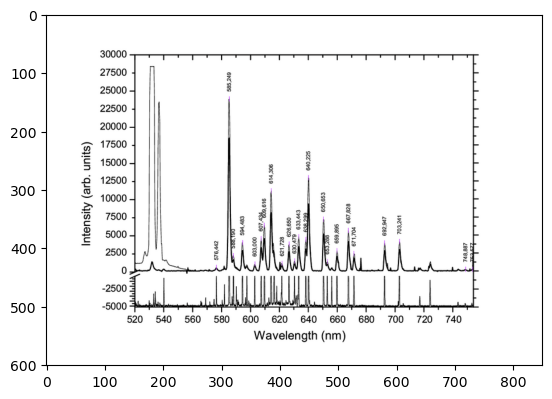

In [3]:
fig, axes = plt.subplots()
lamp_image = plt.imread(str(lamp_file))
plt.imshow(lamp_image)
plt.show()

Definition des Kalibrierspektrums

In [4]:
homepath = Path('.')
fits_path = homepath / '..' / 'data' / 'NEON'
fits_name = 'Light_NEON_10sec_Bin1_22.1C_gain0_2025-06-04_211202_frame0001.fit'
fits_file = fits_path / fits_name


Laden der FITS-Datei

In [5]:
with fits.open(str(fits_file)) as hdul:
    hdul.info()
    data = hdul[0].data

Filename: ../data/NEON/Light_NEON_10sec_Bin1_22.1C_gain0_2025-06-04_211202_frame0001.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   (4944, 3284)   int16 (rescales to uint16)   


Anzeige der FITS Datei

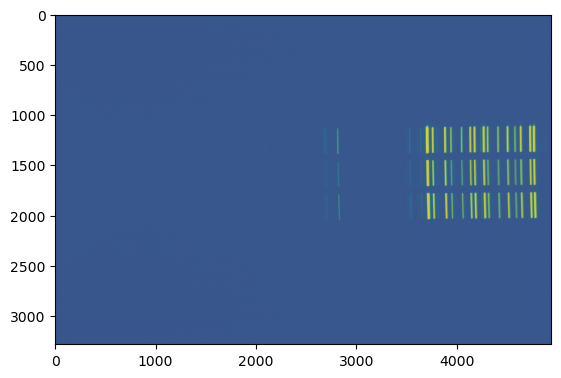

In [6]:
fig, axes = plt.subplots()
plt.imshow(data,vmin=0,vmax=1000)
plt.show()

Auswahl eines Schnitts bei y = 1500 entlang der Dispersionsachse

In [7]:
trace = data[1500,:]
trace_n = trace/max(trace)

Anzeige des Schnitts

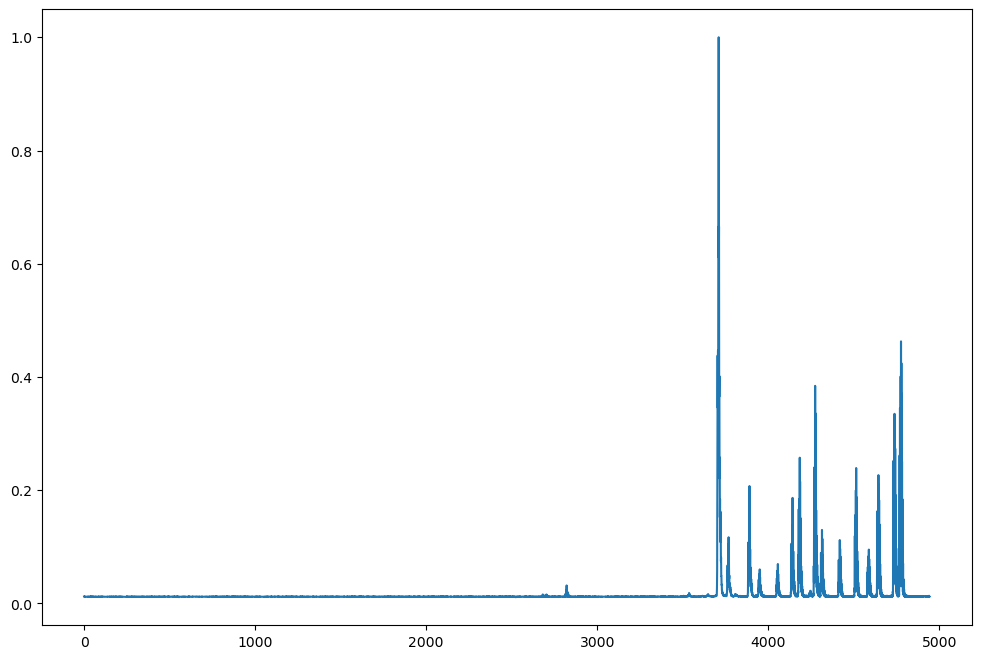

In [8]:
plt.rcParams['figure.figsize'] = (12,8)
fig, axes = plt.subplots()
plt.plot(trace_n)
plt.show()

Bestimmung der Linienpositionen mit scipy.find_peaks() - es werden Linienspitzen gesucht mit einer minimalen Intensität von 0.05 und einer Distanz zur nächsten Linienspitze von 15 (Pixel)) - Die Wahl der Parameter ist so zu wählen, dass möglichst nur die Linien gefunden werden, die auch im Referenzspektrum gekennzeichnet sind.

In [9]:
peak_positions = find_peaks(trace_n,0.05, distance=15)
print(peak_positions[0])
print(peak_positions[1]['peak_heights'])

[3710 3768 3890 3950 4056 4142 4184 4274 4314 4418 4514 4588 4644 4738
 4776]
[1.         0.11697045 0.20739692 0.06016634 0.06972217 0.18651566
 0.25747655 0.38435675 0.12988852 0.11201557 0.23924969 0.09520439
 0.22668554 0.33498496 0.46292692]


Manuelle Liste der Referenzlinien zu den gefundenen Peaks - falls Nan: keine Zuordnung. Angabe in nm hier

In [10]:
line_labels = '585,249 588.190 594,483 NaN 603,000 607,434 609,616 614,306 NaN 621,728 626,650 630,479 633,443 638,299 640,225'
line_idents = line_labels.replace('NaN','np.nan').replace(',','.').replace(' ',',').split(',')
line_idents

['585.249',
 '588.190',
 '594.483',
 'np.nan',
 '603.000',
 '607.434',
 '609.616',
 '614.306',
 'np.nan',
 '621.728',
 '626.650',
 '630.479',
 '633.443',
 '638.299',
 '640.225']

Plot der gefundenen Linien

3710,  1.00 585.249
3768,  0.12 588.190
3890,  0.21 594.483
3950,  0.06 np.nan
4056,  0.07 603.000
4142,  0.19 607.434
4184,  0.26 609.616
4274,  0.38 614.306
4314,  0.13 np.nan
4418,  0.11 621.728
4514,  0.24 626.650
4588,  0.10 630.479
4644,  0.23 633.443
4738,  0.33 638.299
4776,  0.46 640.225


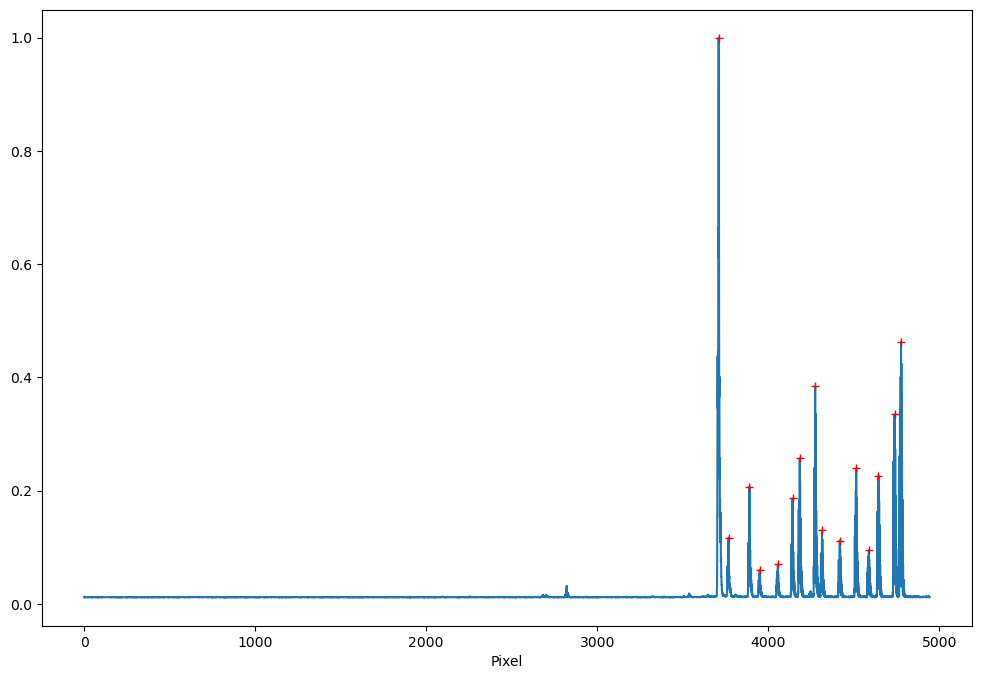

In [11]:
plt.rcParams['figure.figsize'] = (12,8)
fig, axes = plt.subplots()
plt.plot(trace_n)
for pos,val,ident in zip(peak_positions[0], peak_positions[1]['peak_heights'],line_idents):
    print(f'{pos}, {val:5.2f} {ident}')
    plt.plot(pos, val,'+',color='red')
plt.xlabel('Pixel')
plt.show()

Nun Ermmittlung der Relation Wellenlänge zu Position (Dispersionsbeziehung). 
Dazu wird ein Fit in Bezug auf alle gefundenen Positionen mit einer Gerade ausgeführt.

Im Annschluss werden die Paramter des Fits (also hier die Koeffizienten des Polynoms) ausgegeben und geplottet.

[5.16220206e-01 3.93665555e+03]


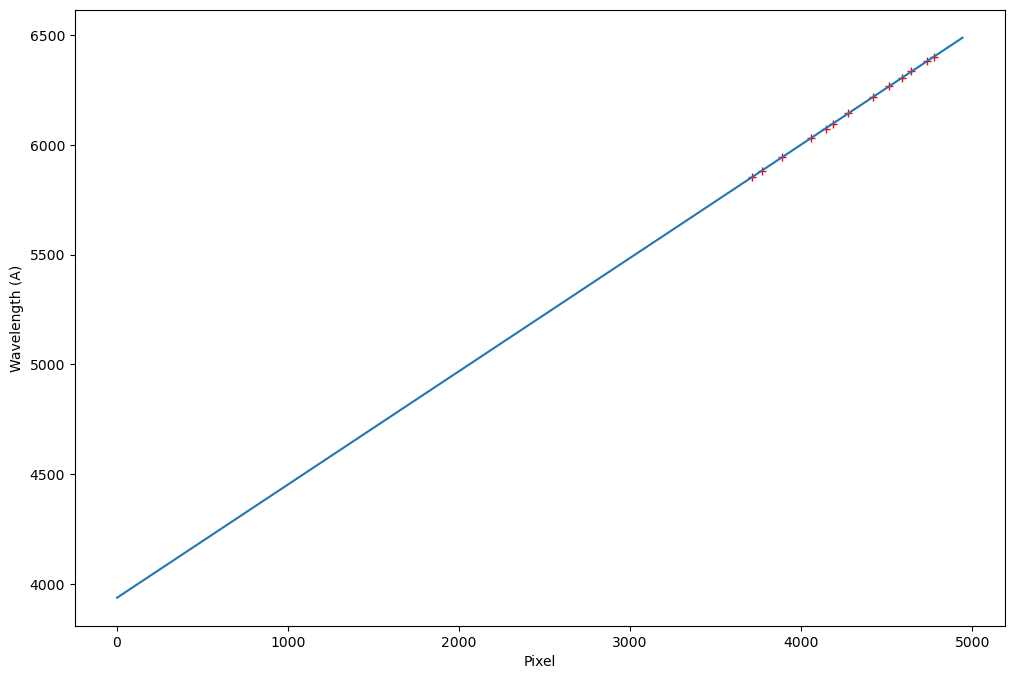

In [12]:
plt.rcParams['figure.figsize'] = (12,8)
fig, axes = plt.subplots()
x = []
y = []
for pos,ident in zip(peak_positions[0], line_idents):
    if not ident ==('np.nan'):
        plt.plot(pos, float(ident)*10,'+',color='red')
        x.append(pos)
        y.append(float(ident)*10)
plt.xlim = [0,4944]
plt.ylim = [4000,7500]
z = np.polyfit(x,y,1)
print(z)
p = np.poly1d(z)
positions = range(0,4944,1)
waves = p(positions)
plt.plot(positions,waves)
plt.ylabel('Wavelength (A)')
plt.xlabel('Pixel')
plt.show()